# Titanic: Machine Learning from Disaster

### Predict survival on the Titanic
- Defining the problem statement
- Collecting the data
- Exploratory data analysis
- Feature engineering
- Modelling
- Testing

# 1. Defining the problem statement:

Conducting an analysis on predicting the sort of people who were likely to survive. We are going to apply the tools of machine learning to predict which passengers survivied the tragedy

In [1]:
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095eabce4b02d37bef4c24c/1352002236895/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg")

# 2. Collecting the Data:

The data comes from Kaggle, they are providing us with training and testing set. link to the data is found on my github: https://github.com/Haalibrahim/Titanic-case-study

### Load libraries, train and test data

In [566]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [567]:
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [568]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv') 

# 3. Exploratory data analysis:

### Data Dictionary: 
- Survived: 0 = No, 1= Yes
- Pclass: Ticket class 1 = 1st, 2= 2nd, 3 = 3rd
- Sibsp: Number of siblings / spouses aboard the titanic
- Parch: Number of parents/ childern abroad the titanic
- Ticket: Ticket number 
- Fare: price of the ticket
- Cabin: Number of the Cabin
- Embarked: Port of Embarkation, C= Cherbourg , Q= Queenstown, S= Southhampton

In [570]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [571]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [572]:
train.shape

(891, 12)

In [573]:
test.shape

(418, 11)

In [574]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [575]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [576]:
train.isna().sum() # = train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [577]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [578]:
#Let us explore the data: (pay attention to the age column)
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [579]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Bar Chart for Categorical Features
- Pclass
- Sex
- SibSp ( # of siblings and spouse)
- Parch ( # of parents and children)
- Embarked
- Cabin

In [580]:
# Count of people who survive:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [581]:
def bar_chart(feature):
    Survived= train[train['Survived']==1][feature].value_counts()
    Dead= train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([Survived,Dead])
    df.index= ['Survived','Dead']
    df.plot(kind='bar', stacked =True, figsize =(10,5))

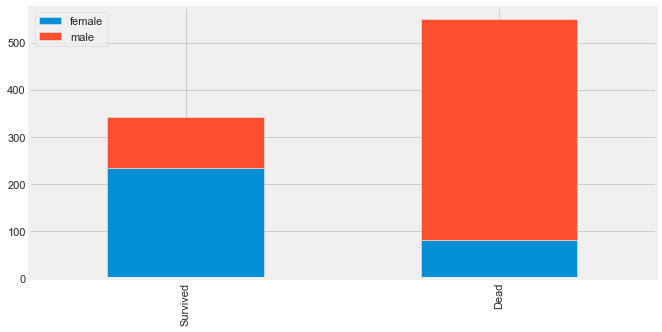

In [582]:
bar_chart('Sex')

Women are more likely to survive than Men

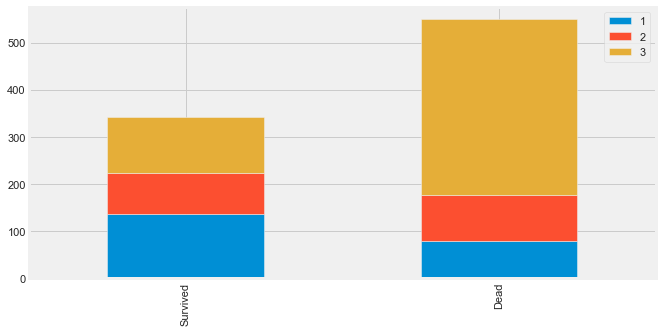

In [583]:
bar_chart('Pclass')

The Chart confirms 1st class more likely survivied than other classes
The Chart confirms 3rd class more likely dead than other classes

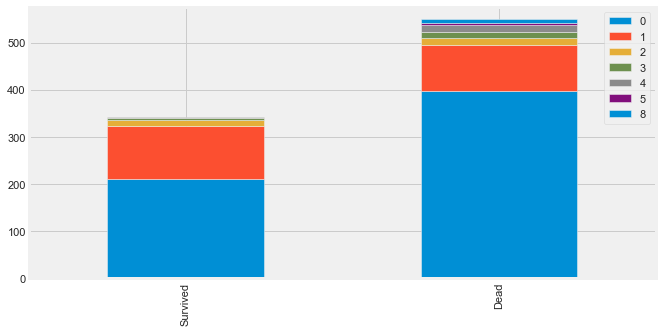

In [584]:
bar_chart('SibSp')

The Chart confirms a person aboarded with more than 2 siblings or spouse more likely survived
The Chart confirms a person aboarded without siblings or spouse more likely dead

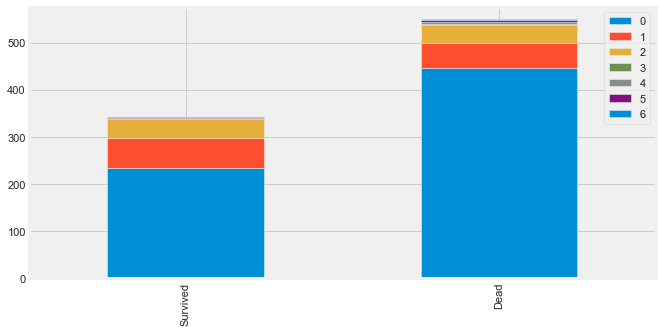

In [585]:
bar_chart('Parch')

The Chart confirms a person aboarded with more than 2 parents or children more likely survived
The Chart confirms a person aboarded alone more likely dead

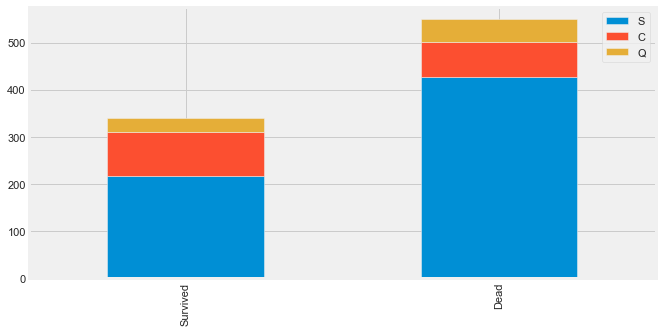

In [586]:
bar_chart('Embarked')

- The Chart confirms a person aboarded from C slightly more likely survived
- The Chart confirms a person aboarded from Q more likely dead
- The Chart confirms a person aboarded from S more likely dead

# 4. Feature engineering 

- The purpose of Feautre engineering is to prepare the data for machine learning algorithms by creating feature vectors.
- Feature vector is an n dimensional vector that represent some object

In [587]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 4.1 how titanic sank?

- sank from the bow of the ship where third class rooms located
- conclusion, Pclass is key feature for classifier

In [24]:
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg?format=1500w")

## 4.2 Name

In [588]:
train_test_data=[train,test] # combining train and test dataset

train['Title']=0
for i in train_test_data:
    train['Title']=train.Name.str.extract('([A-Za-z]+)\.') #extracting Name initials
    test['Title']=test.Name.str.extract('([A-Za-z]+)\.')

In [589]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Jonkheer      1
Don           1
Lady          1
Sir           1
Mme           1
Ms            1
Capt          1
Countess      1
Name: Title, dtype: int64

In [590]:
train['Title'].value_counts().sum()

891

In [591]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dr          1
Dona        1
Ms          1
Name: Title, dtype: int64

In [592]:
test['Title'].value_counts().sum()

418

In [593]:
pd.crosstab(train.Title,train.Sex).T.style.background_gradient(cmap='summer_r')


Title,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [594]:
pd.crosstab(test.Title,test.Sex).T.style.background_gradient(cmap='summer_r')


Title,Col,Dona,Dr,Master,Miss,Mr,Mrs,Ms,Rev
Sex,,,,,,,,,
female,0,1,0,0,78,0,72,1,0
male,2,0,1,21,0,240,0,0,2


In [595]:
train['Title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess',
                               'Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss',
                                'Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

test['Title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess',
                               'Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss',
                                'Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [596]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [597]:
train['Title'].value_counts()

Mr        529
Miss      186
Mrs       127
Master     40
Other       9
Name: Title, dtype: int64

In [598]:
train['Title'].value_counts().sum()

891

In [599]:
test['Title'].value_counts()

Mr        241
Miss       79
Mrs        72
Master     21
Other       4
Dona        1
Name: Title, dtype: int64

In [600]:
test['Title'].value_counts().sum()

418

In [601]:
# delete unnecessary feature from dataset
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [602]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [603]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [604]:
pd.crosstab(train.Title,train.Sex).T.style.background_gradient(cmap='summer_r')


Title,Master,Miss,Mr,Mrs,Other
Sex,,,,,
female,0,186,1,127,0
male,40,0,528,0,9


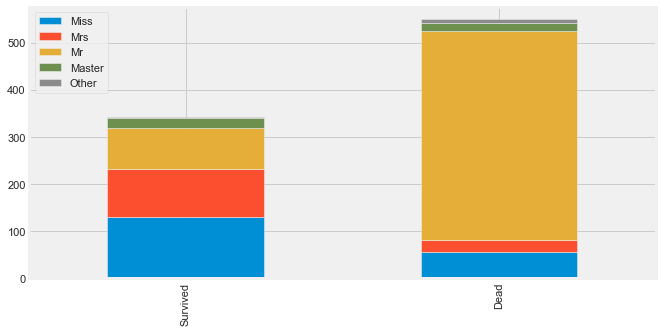

In [605]:
bar_chart('Title')

## 4.3 Age 

In [606]:
print('Oldest person Survived was of:',train['Age'].max())
print('Youngest person Survived was of:',train['Age'].min())
print('Average person Survived was of:',train['Age'].mean())

Oldest person Survived was of: 80.0
Youngest person Survived was of: 0.42
Average person Survived was of: 29.69911764705882


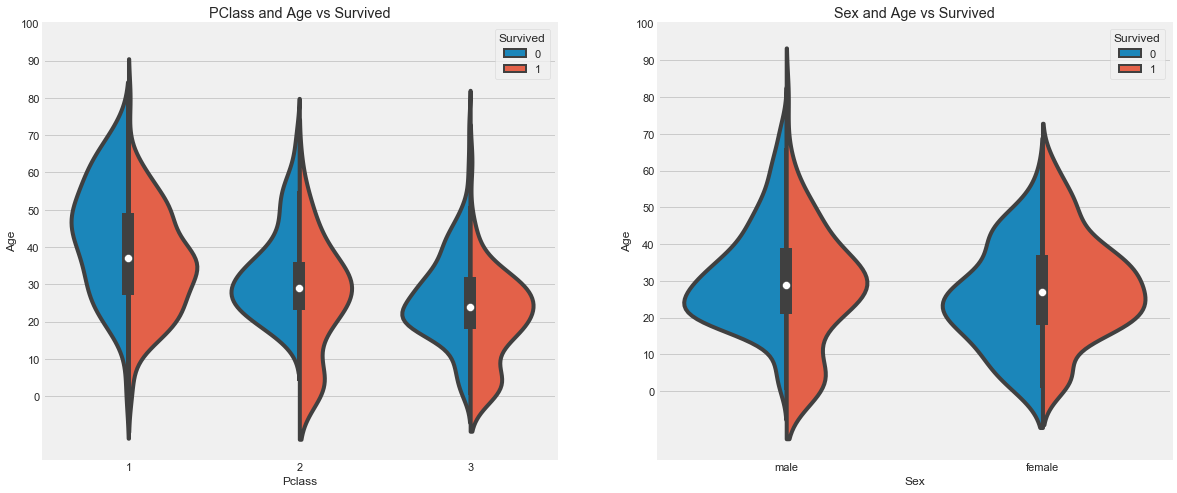

In [607]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot('Pclass','Age',hue='Survived',data=train,split=True,ax=ax[0])
ax[0].set_title('PClass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=train,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

In [608]:
train.groupby('Title')['Age'].mean()


Title
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [609]:
train.loc[(train.Age.isnull()) & (train.Title=='Mr'),'Age']=33
train.loc[(train.Age.isnull()) & (train.Title=='Mrs'),'Age']=36
train.loc[(train.Age.isnull()) & (train.Title=='Master'),'Age']=5
train.loc[(train.Age.isnull()) & (train.Title=='Miss'),'Age']=22
train.loc[(train.Age.isnull()) & (train.Title=='Other'),'Age']=46

In [610]:
train.Age.isnull().any()


False

### Title map
- Mr : 0
- Miss : 1
- Mrs: 2
- Master: 3
- Other: 4

In [611]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Other":4 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

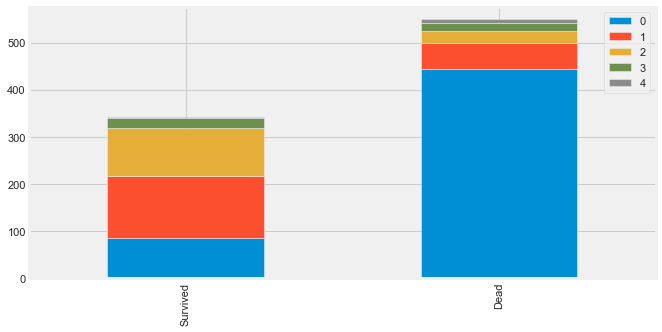

In [619]:
bar_chart('Title')

In [612]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [613]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2.0
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2.0


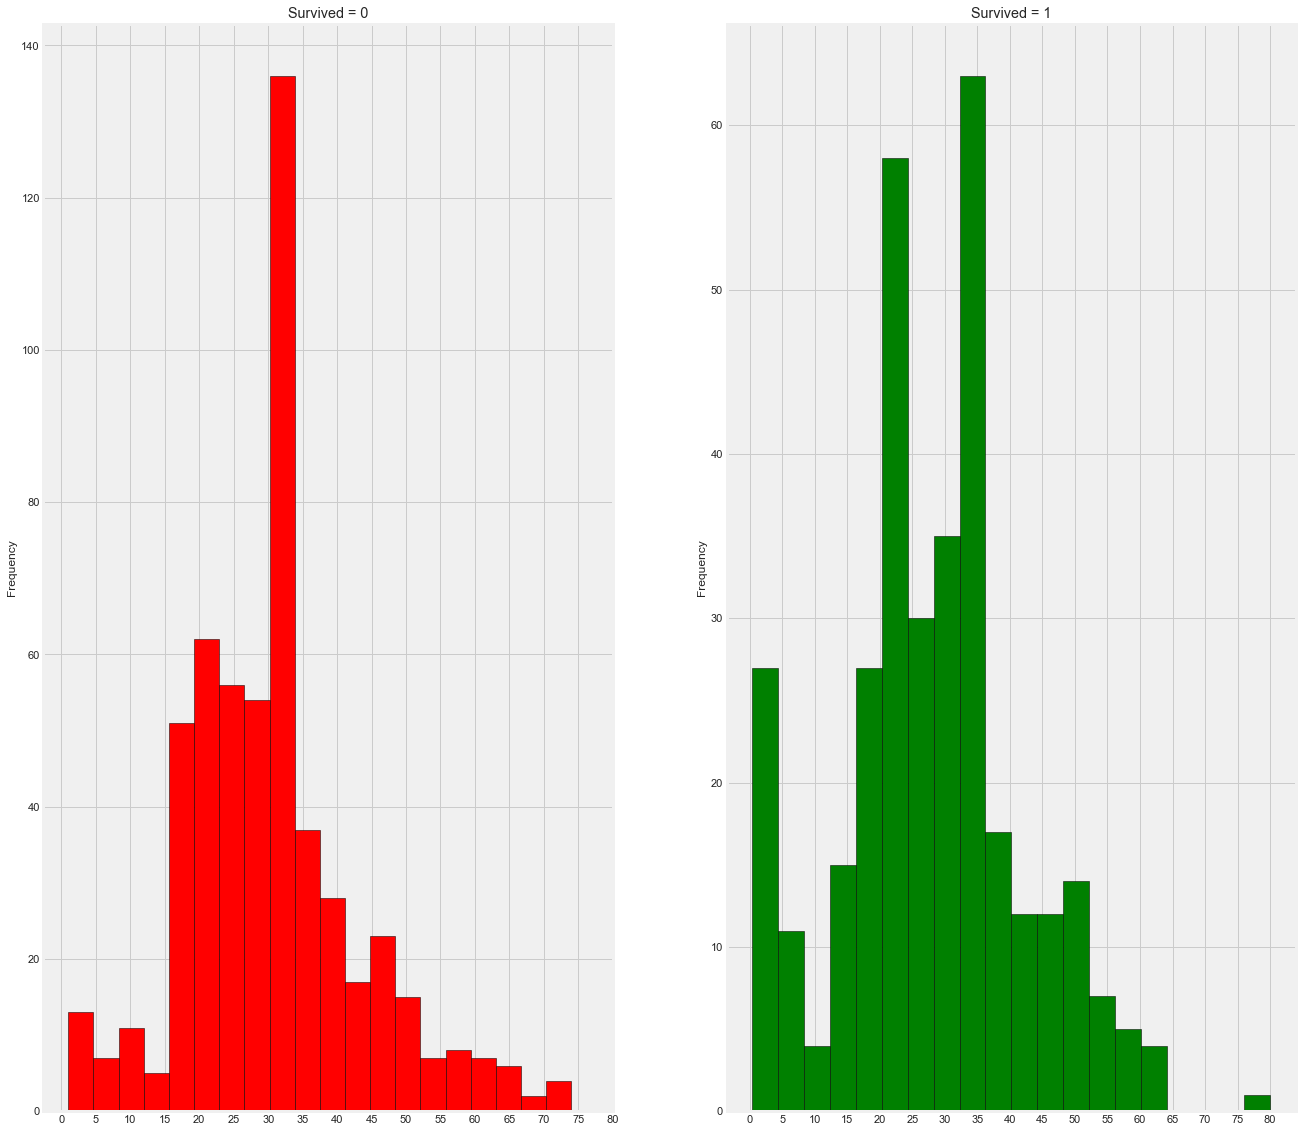

In [614]:
f,ax=plt.subplots(1,2,figsize=(20,20))
train[train['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived = 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
train[train['Survived']==1].Age.plot.hist(ax=ax[1],bins=20,edgecolor='black',color='green')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
ax[1].set_title('Survived = 1')
plt.show()

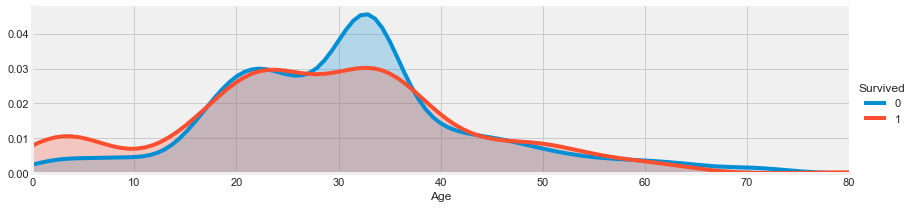

In [615]:
facet =sns.FacetGrid(train, hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.show()

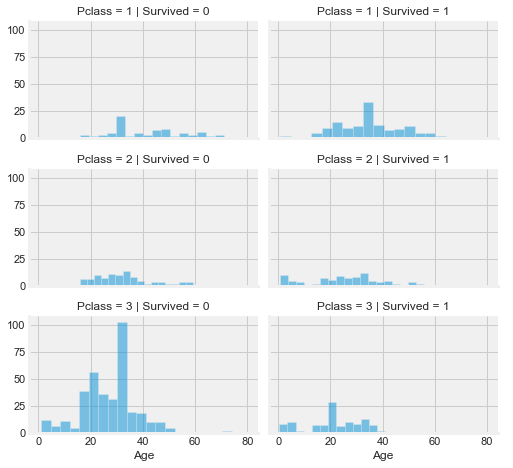

In [616]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [617]:
for dataset in train_test_data:
    dataset.loc[dataset['Age']<= 16, 'Age']= 0,
    dataset.loc[(dataset['Age']> 16) & (dataset['Age']<=26), 'Age']= 1,
    dataset.loc[(dataset['Age']> 26) & (dataset['Age']<=36), 'Age']= 2,
    dataset.loc[(dataset['Age']> 36) & (dataset['Age']<=62), 'Age']= 3,
    dataset.loc[dataset['Age']> 62, 'Age']= 4

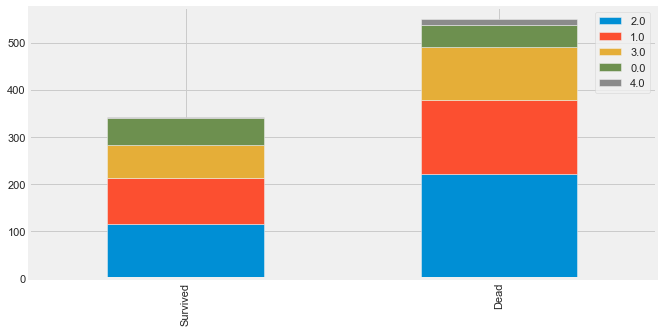

In [620]:
bar_chart("Age")

In [621]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,2.0,0,0,373450,8.0500,NaN,S,0


## 4.4 Sex


In [622]:
train.groupby(['Sex', 'Survived'])['Survived'].count()


Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [623]:
train.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


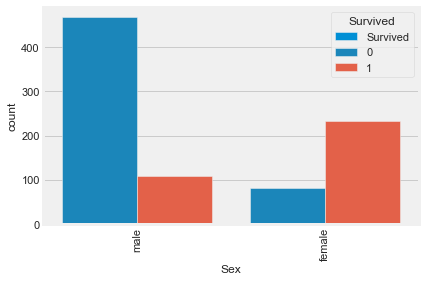

In [624]:
train[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()
sns.countplot('Sex',hue='Survived',data=train,)
plt.show()

In [625]:
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

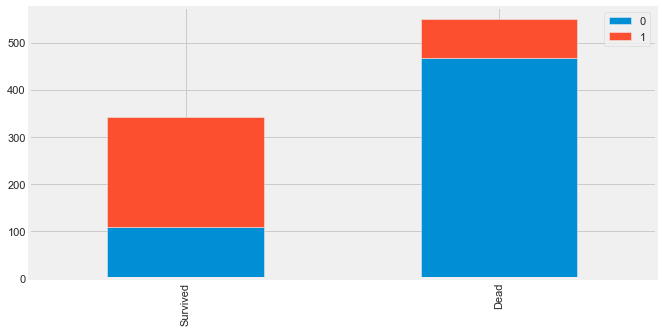

In [626]:
bar_chart('Sex')

In [627]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


In [628]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          891 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [629]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Title          417 non-null float64
dtypes: float64(3), int64(5), object(3)
memory usage: 36.0+ KB


## 4.5 Pclass

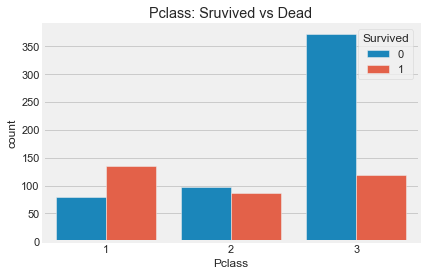

In [630]:
sns.countplot('Pclass', hue='Survived', data=train)
plt.title('Pclass: Sruvived vs Dead')
plt.show()

In [631]:
pd.crosstab([train.Sex,train.Survived],train.Pclass,margins=True).style.background_gradient(cmap='summer_r')

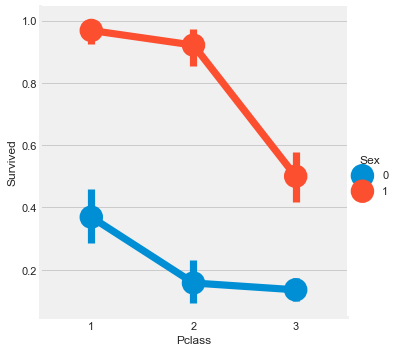

In [632]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=train)
plt.show()

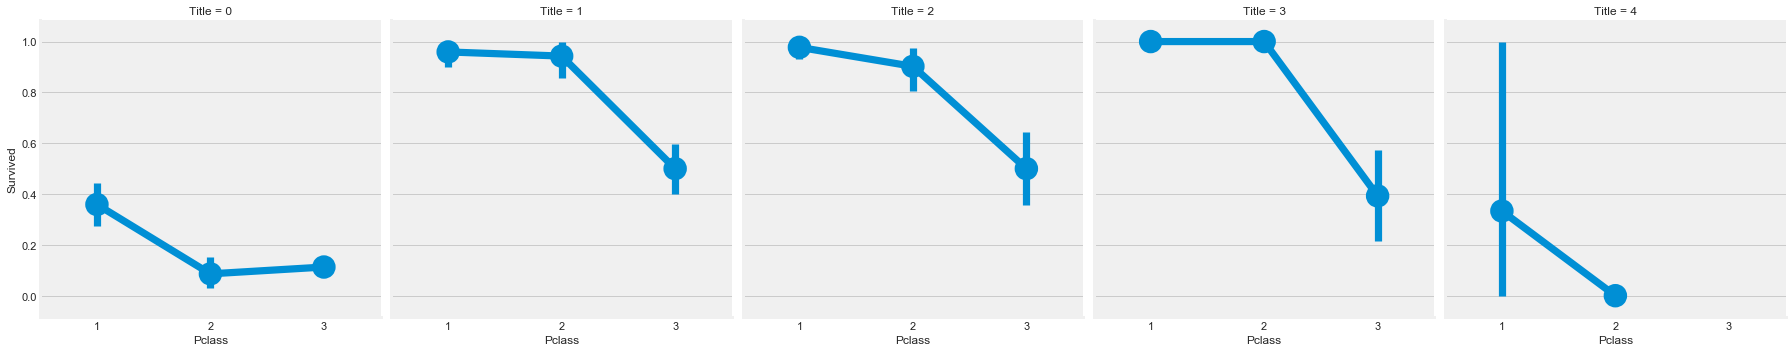

In [633]:
sns.factorplot('Pclass','Survived',col='Title',data=train)
plt.show()

## 4.6 SibSip


In [634]:
pd.crosstab([train.SibSp],train.Survived).style.background_gradient('summer_r')


Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


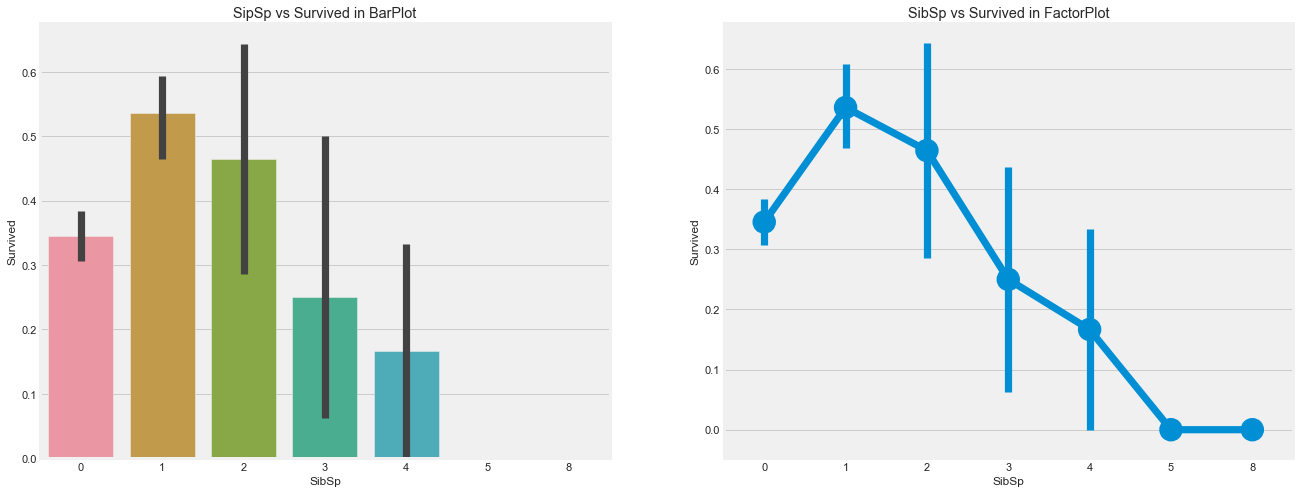

In [635]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived', data=train,ax=ax[0])
ax[0].set_title('SipSp vs Survived in BarPlot')
sns.factorplot('SibSp','Survived', data=train,ax=ax[1])
ax[1].set_title('SibSp vs Survived in FactorPlot')
plt.close(2)
plt.show()

In [636]:
pd.crosstab(train.SibSp,train.Pclass).style.background_gradient('summer_r')


Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


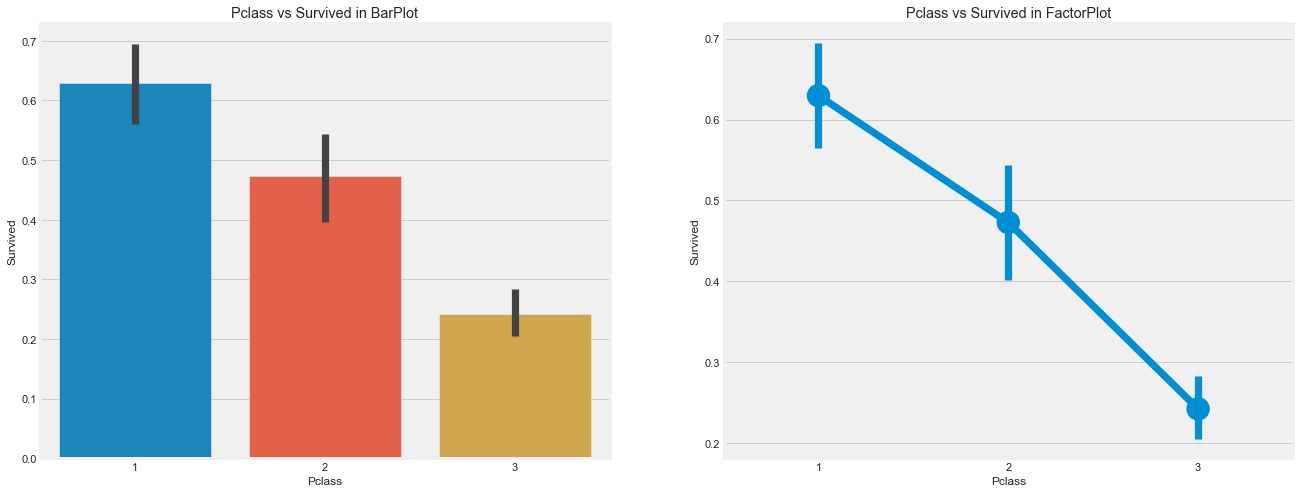

In [637]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Pclass','Survived', data=train,ax=ax[0])
ax[0].set_title('Pclass vs Survived in BarPlot')
sns.factorplot('Pclass','Survived', data=train,ax=ax[1])
ax[1].set_title('Pclass vs Survived in FactorPlot')
plt.close(2)
plt.show()

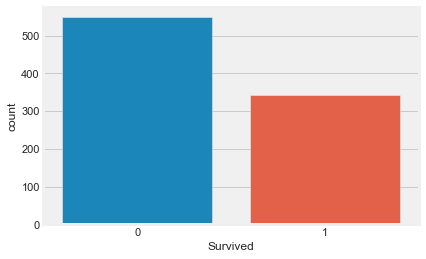

In [638]:
sns.countplot(train['Survived'],label="Count")

## 4.7 Embarked

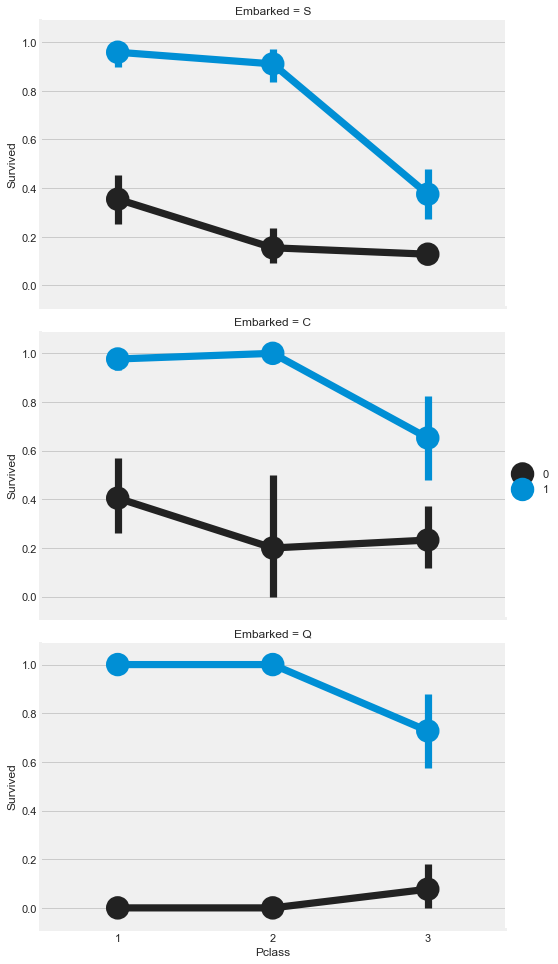

In [639]:
FacetGrid = sns.FacetGrid(train, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

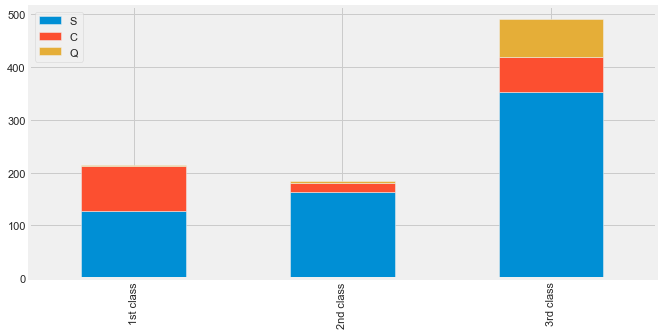

In [640]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

fill out missing embark with S embark


In [641]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [642]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


In [643]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [644]:
train.Embarked.isnull().any()

False

In [645]:
#Look at survival rate by sex, age and class
age = pd.cut(train['Age'], [0, 18, 80])
train.pivot_table('Survived', ['Sex', age], 'Pclass')

,Pclass,1,2,3
Sex,Age,,,
0,"(0, 18]",0.352941,0.082474,0.114379
1,"(0, 18]",0.977273,0.909091,0.486486


## 4.8 Fare price


In [646]:
# fill for missing value with the median fare for each class: 
train['Fare'].fillna(train.groupby('Pclass')['Fare'].transform('median'), inplace= True)
test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform('median'), inplace= True)

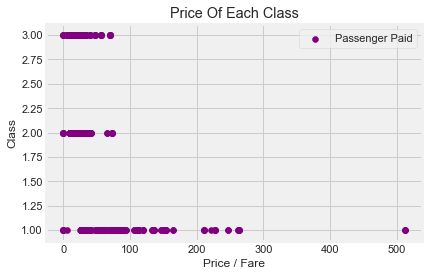

In [647]:
#Plot the Prices Paid Of Each Class
plt.scatter(train['Fare'], train['Pclass'],  color = 'purple', label='Passenger Paid')
plt.ylabel('Class')
plt.xlabel('Price / Fare')
plt.title('Price Of Each Class')
plt.legend()
plt.show()

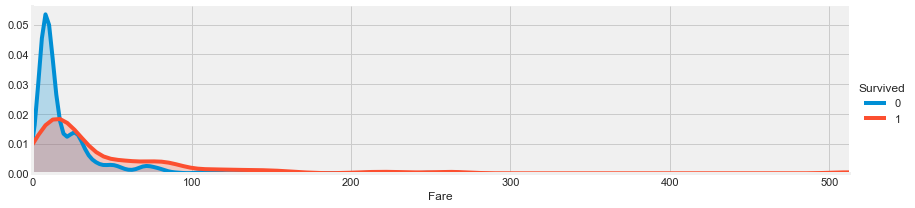

In [648]:
facet =sns.FacetGrid(train, hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.show()

(0, 200)

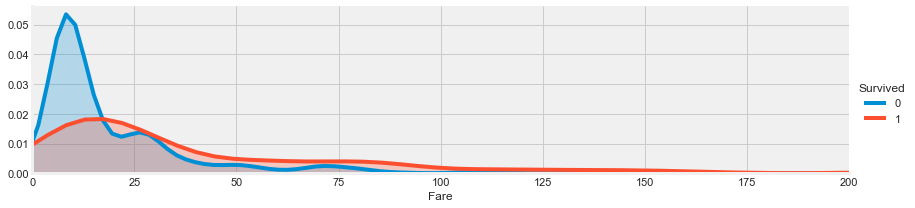

In [649]:
facet =sns.FacetGrid(train, hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0,200)

In [650]:
 for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [651]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


In [652]:
train.Fare.isnull().any()

False

## 4.9 Cabins

In [653]:
train.Cabin.value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
E101           3
C22 C26        3
              ..
A26            1
B86            1
B4             1
A10            1
C110           1
Name: Cabin, Length: 147, dtype: int64

In [654]:
for dataset in train_test_data:
    dataset['Cabin']=dataset['Cabin'].str[:1]

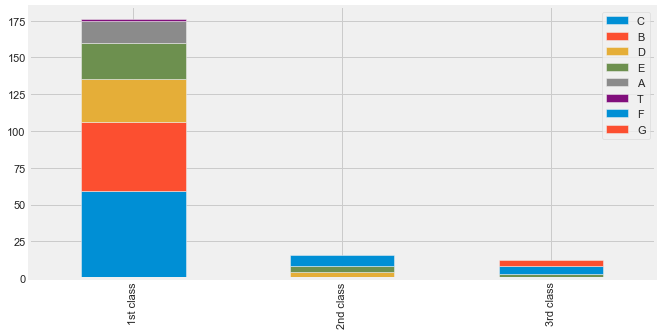

In [655]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df=pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index= ['1st class','2nd class','3rd class']
df.plot(kind = 'bar', stacked = True, figsize =(10,5))

In [656]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [657]:
# fill missing Fare with median fare for each Pclass
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [658]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0


In [659]:
train.Embarked.isnull().any()

False

## 4.10 FamilySize


In [660]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

(0, 11.0)

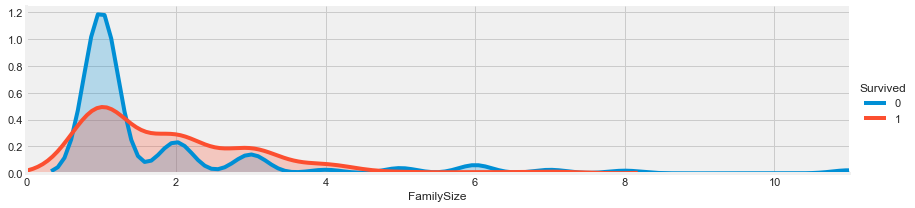

In [661]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [662]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [663]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0


In [220]:
#Print the unique values in the columns
print(train['Sex'].unique())
print(train['Embarked'].unique())

['male' 'female']
['S' 'C' 'Q' nan]


# 5. Modeling

### 5.1 Supervised Learning

In [664]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [665]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null float64
Embarked       891 non-null int64
Title          891 non-null int64
FamilySize     891 non-null float64
dtypes: float64(4), int64(8), object(1)
memory usage: 90.6+ KB


In [666]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [667]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [668]:
train_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,2.0,2.0,0.8,0,2,0.4
4,3,0,2.0,0.0,2.0,0,0,0.0


In [669]:
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

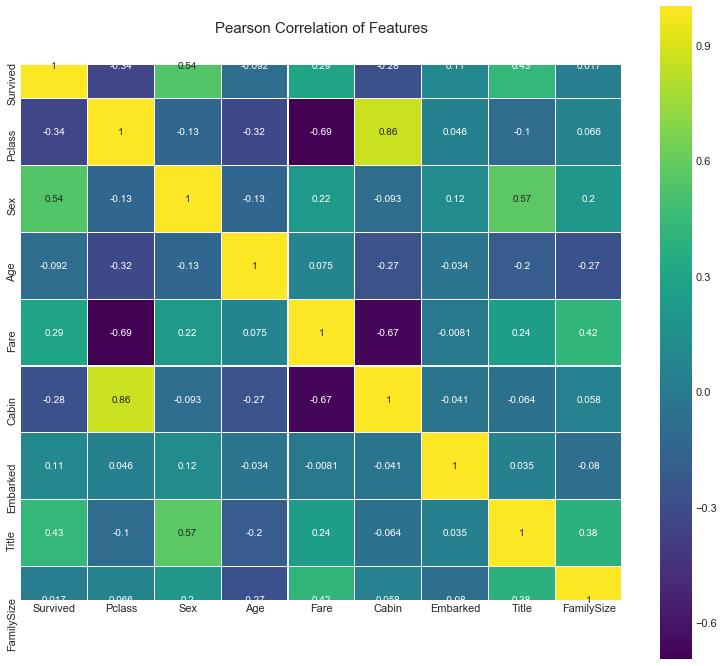

In [670]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)


In [671]:
# Split the dataset into 80% Training set and 20% Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train_data, target, test_size = 0.2, random_state = 0)

In [672]:
# Scale the data to bring all features to the same level of magnitude
# This means the data will be within a specific range for example 0 -100 or 0 - 1

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [673]:
def models(X_train,Y_train):

  
  #Using Logistic Regression Algorithm to the Training Set
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, Y_train)
  
  #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)

  #Using SVC method of svm class to use Support Vector Machine Algorithm
  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear', random_state = 0)
  svc_lin.fit(X_train, Y_train)

  #Using SVC method of svm class to use Kernel SVM Algorithm
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_rbf.fit(X_train, Y_train)

  #Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, Y_train)

  #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)
  
  #print model accuracy on the training data.
  print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
  print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
  print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))
  print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train))
  print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))
  print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
  print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
  
  return log, knn, svc_lin, svc_rbf, gauss, tree, forest

In [674]:
#Get and train all of the models
model = models(X_train,Y_train)

[0]Logistic Regression Training Accuracy: 0.8314606741573034
[1]K Nearest Neighbor Training Accuracy: 0.8553370786516854
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.8286516853932584
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.848314606741573
[4]Gaussian Naive Bayes Training Accuracy: 0.7823033707865169
[5]Decision Tree Classifier Training Accuracy: 0.901685393258427
[6]Random Forest Classifier Training Accuracy: 0.8932584269662921


In [675]:
#Show the confusion matrix and accuracy for all of the models on the test data
#Classification accuracy is the ratio of correct predictions to total predictions made.
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
  cm = confusion_matrix(Y_test, model[i].predict(X_test))

  #extracting true_positives, false_positives, true_negatives, false_negatives
  TN, FP, FN, TP = confusion_matrix(Y_test, model[i].predict(X_test)).ravel()

  print(cm)
  print('Model[{}] Testing Accuracy = "{} !"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
  print()# Print a new line

[[92 18]
 [17 52]]
Model[0] Testing Accuracy = "0.8044692737430168 !"

[[97 13]
 [20 49]]
Model[1] Testing Accuracy = "0.8156424581005587 !"

[[91 19]
 [17 52]]
Model[2] Testing Accuracy = "0.7988826815642458 !"

[[100  10]
 [ 22  47]]
Model[3] Testing Accuracy = "0.8212290502793296 !"

[[82 28]
 [ 7 62]]
Model[4] Testing Accuracy = "0.8044692737430168 !"

[[97 13]
 [25 44]]
Model[5] Testing Accuracy = "0.7877094972067039 !"

[[100  10]
 [ 23  46]]
Model[6] Testing Accuracy = "0.8156424581005587 !"



In [750]:
#Get Feature importance
forest=model[6]
importances = pd.DataFrame({'feature':train_data.iloc[:,0:8].columns, 'importance': np.round(forest.feature_importances_, 3)})
importances= importances.sort_values('importance', ascending=False).set_index('feature')
importances

,importance
feature,
Title,0.257
Sex,0.135
FamilySize,0.129
Age,0.127
Cabin,0.107
Fare,0.097
Pclass,0.084
Embarked,0.064


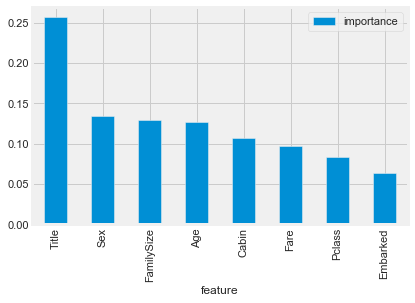

In [748]:
#Visualize the importance
importances.plot.bar()

In [751]:
#print the prediction of the random forest classifier 
pred = model[6].predict(X_test)
print(pred)

print()

#print the actual value
print(Y_test)

[0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0
 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1
 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]

495    0
648    0
278    0
31     1
255    1
      ..
780    1
837    0
215    1
833    0
372    0
Name: Survived, Length: 179, dtype: int64


In [761]:
#my survival
#Pclass	Sex	Age	Fare	Cabin	Embarked	Title	FamilySize
 
#scaling my survival
my_survival = [[2, 0, 3, 2, 0.8, 0, 0, 0.8]]

#scaling: 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
my_survival_scaled = sc.fit_transform(my_survival)

#print prediction of my survival using Random forest calssifier:
pred= model[6].predict(my_survival_scaled)

print(pred)

if pred  == 0:
    print('Oh no you didn not survive')
else:
    print('nice! you survived!')


[1]
nice! you survived!


### ROC and AUC using logistic regression as an example

In [676]:
  #Using Logistic Regression Algorithm to the Training Set
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, Y_train)
Y_predict=log.predict(X_test)

In [677]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,Y_predict))
pd.crosstab(Y_test, Y_predict)

0.8044692737430168


col_0,0,1
Survived,,
0,92,18
1,17,52


In [678]:
log.predict_proba(X_test)

array([[0.90562449, 0.09437551],
       [0.92146315, 0.07853685],
       [0.66984458, 0.33015542],
       [0.03898146, 0.96101854],
       [0.39961516, 0.60038484],
       [0.56001427, 0.43998573],
       [0.09451128, 0.90548872],
       [0.13543067, 0.86456933],
       [0.52243664, 0.47756336],
       [0.21745097, 0.78254903],
       [0.91920705, 0.08079295],
       [0.31239561, 0.68760439],
       [0.8869834 , 0.1130166 ],
       [0.176777  , 0.823223  ],
       [0.04009628, 0.95990372],
       [0.22778632, 0.77221368],
       [0.88025683, 0.11974317],
       [0.81108283, 0.18891717],
       [0.92146315, 0.07853685],
       [0.3501963 , 0.6498037 ],
       [0.73578675, 0.26421325],
       [0.03936127, 0.96063873],
       [0.8869834 , 0.1130166 ],
       [0.56001427, 0.43998573],
       [0.32009766, 0.67990234],
       [0.07297558, 0.92702442],
       [0.92146315, 0.07853685],
       [0.32009766, 0.67990234],
       [0.09101505, 0.90898495],
       [0.67756724, 0.32243276],
       [0.

In [679]:
log.predict_proba(X_test)[:,1]

array([0.09437551, 0.07853685, 0.33015542, 0.96101854, 0.60038484,
       0.43998573, 0.90548872, 0.86456933, 0.47756336, 0.78254903,
       0.08079295, 0.68760439, 0.1130166 , 0.823223  , 0.95990372,
       0.77221368, 0.11974317, 0.18891717, 0.07853685, 0.6498037 ,
       0.26421325, 0.96063873, 0.1130166 , 0.43998573, 0.67990234,
       0.92702442, 0.07853685, 0.67990234, 0.90898495, 0.32243276,
       0.09437551, 0.68760439, 0.07853685, 0.43998573, 0.0521955 ,
       0.46989148, 0.05069393, 0.1836646 , 0.26421325, 0.12354885,
       0.18821898, 0.14260588, 0.07853685, 0.03659778, 0.94603527,
       0.07853685, 0.07853685, 0.82755933, 0.12354885, 0.19443574,
       0.4058552 , 0.51774665, 0.823223  , 0.11974317, 0.43524409,
       0.18891717, 0.28311373, 0.27706784, 0.24794817, 0.06218216,
       0.14260588, 0.39003175, 0.86808633, 0.48995927, 0.55132291,
       0.1130166 , 0.75134377, 0.84384509, 0.823223  , 0.93546089,
       0.90898495, 0.24131063, 0.38297839, 0.07853685, 0.11974

In [680]:
np.where(log.predict_proba(X_test)[:,1] >0.3,1,0) #threshold 0.3

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])

In [681]:
th3= np.where(log.predict_proba(X_test)[:,1] >0.3,1,0) #threshold 0.3
th4=np.where(log.predict_proba(X_test)[:,1] >0.4,1,0) #threshold 0.4
th5=np.where(log.predict_proba(X_test)[:,1] >0.5,1,0) #threshold 0.5
th6=np.where(log.predict_proba(X_test)[:,1] >0.6,1,0) #threshold 0.6
th8=np.where(log.predict_proba(X_test)[:,1] >0.8,1,0) #threshold 0.6


In [682]:
pd.crosstab(Y_test, th3)

col_0,0,1
Survived,,
0,81,29
1,9,60


In [683]:
pd.crosstab(Y_test, th4)

col_0,0,1
Survived,,
0,89,21
1,9,60


In [684]:
pd.crosstab(Y_test, th5)

col_0,0,1
Survived,,
0,92,18
1,17,52


In [685]:
pd.crosstab(Y_test, th6)

col_0,0,1
Survived,,
0,97,13
1,23,46


In [686]:
def predict_thrs (log,X_test,thrs):
    import numpy as np
    Y_predict = np.where(log.predict_proba(X_test)[:,1] >thrs,1,0)
    return Y_predict

In [687]:
import numpy as np
from sklearn.metrics import confusion_matrix
for thr in np.arange(0,1.1,0.1):
    Y_predict= predict_thrs(log, X_test,thr)
    print("Threshold :", thr)
    print(confusion_matrix(Y_test, Y_predict))

Threshold : 0.0
[[  0 110]
 [  0  69]]
Threshold : 0.1
[[35 75]
 [ 2 67]]
Threshold : 0.2
[[70 40]
 [ 8 61]]
Threshold : 0.30000000000000004
[[81 29]
 [ 9 60]]
Threshold : 0.4
[[89 21]
 [ 9 60]]
Threshold : 0.5
[[92 18]
 [17 52]]
Threshold : 0.6000000000000001
[[97 13]
 [23 46]]
Threshold : 0.7000000000000001
[[100  10]
 [ 30  39]]
Threshold : 0.8
[[106   4]
 [ 38  31]]
Threshold : 0.9
[[109   1]
 [ 50  19]]
Threshold : 1.0
[[110   0]
 [ 69   0]]


In [688]:
from sklearn.metrics import roc_curve, roc_auc_score

In [689]:
tpr,fpr,thrs= roc_curve(Y_test, log.predict_proba(X_test)[:,1])

In [690]:
tpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00909091, 0.00909091, 0.01818182,
       0.01818182, 0.02727273, 0.02727273, 0.03636364, 0.03636364,
       0.03636364, 0.03636364, 0.05454545, 0.05454545, 0.08181818,
       0.08181818, 0.09090909, 0.09090909, 0.09090909, 0.11818182,
       0.11818182, 0.12727273, 0.12727273, 0.14545455, 0.14545455,
       0.15454545, 0.15454545, 0.16363636, 0.16363636, 0.17272727,
       0.17272727, 0.18181818, 0.18181818, 0.19090909, 0.19090909,
       0.22727273, 0.24545455, 0.28181818, 0.31818182, 0.33636364,
       0.34545455, 0.37272727, 0.37272727, 0.38181818, 0.4       ,
       0.4       , 0.43636364, 0.46363636, 0.5       , 0.63636364,
       0.63636364, 0.67272727, 0.69090909, 0.72727273, 0.73636364,
       0.74545455, 0.9       , 0.90909091, 0.90909091, 0.92727273,
       0.97272727, 0.99090909, 1.        ])

In [691]:
fpr

array([0.        , 0.01449275, 0.13043478, 0.15942029, 0.23188406,
       0.26086957, 0.27536232, 0.27536232, 0.31884058, 0.31884058,
       0.34782609, 0.34782609, 0.36231884, 0.36231884, 0.39130435,
       0.43478261, 0.49275362, 0.49275362, 0.50724638, 0.50724638,
       0.53623188, 0.53623188, 0.56521739, 0.5942029 , 0.60869565,
       0.66666667, 0.66666667, 0.68115942, 0.68115942, 0.69565217,
       0.69565217, 0.71014493, 0.71014493, 0.76811594, 0.76811594,
       0.79710145, 0.79710145, 0.8115942 , 0.84057971, 0.86956522,
       0.86956522, 0.86956522, 0.86956522, 0.86956522, 0.86956522,
       0.88405797, 0.88405797, 0.89855072, 0.89855072, 0.89855072,
       0.91304348, 0.91304348, 0.91304348, 0.94202899, 0.94202899,
       0.97101449, 0.97101449, 0.97101449, 0.97101449, 0.97101449,
       0.98550725, 0.98550725, 0.98550725, 1.        , 1.        ,
       1.        , 1.        , 1.        ])

In [692]:
thrs

array([1.97708651, 0.97708651, 0.93546089, 0.93069861, 0.92134818,
       0.90898495, 0.90548872, 0.90429512, 0.88596907, 0.88345555,
       0.86808633, 0.86582601, 0.86456933, 0.84384509, 0.82755933,
       0.823223  , 0.77841845, 0.77130783, 0.77057708, 0.76050066,
       0.75134377, 0.73091539, 0.716971  , 0.68760439, 0.67990234,
       0.60038484, 0.59297938, 0.5822342 , 0.57112164, 0.57096583,
       0.55253614, 0.55132291, 0.54369925, 0.49509208, 0.48995927,
       0.46989148, 0.45469027, 0.4425696 , 0.43998573, 0.4058552 ,
       0.32563006, 0.32243276, 0.27706784, 0.26421325, 0.24394932,
       0.24131063, 0.19835639, 0.19598422, 0.19443574, 0.18891717,
       0.18821898, 0.1836646 , 0.1494494 , 0.12354885, 0.11974317,
       0.11693731, 0.1130166 , 0.09976872, 0.09437551, 0.09306856,
       0.08079295, 0.07853685, 0.07606534, 0.06218216, 0.0521955 ,
       0.05069393, 0.03659778, 0.01561173])

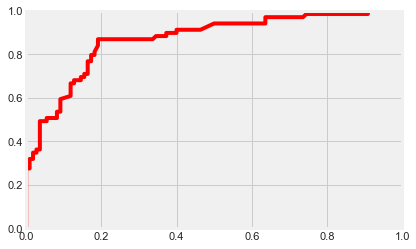

In [693]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,roc_auc_score
%matplotlib inline
fpr,tpr,thrs= roc_curve(Y_test, log.predict_proba(X_test)[:,1])
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.plot(fpr,tpr,color='red')
plt.show()

In [694]:
roc_auc_score(Y_test, log.predict_proba(X_test)[:,1])

0.8704216073781291

### 5.2 Unsupervised learning:

#### 5.2.1 Kmeans

In [695]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [696]:
df = pd.read_csv('Unsupervised.csv')

In [697]:
df.head()

,Name,Age,Fare
0,"Braund, Mr. Owen Harris",22.0,7.2500
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,71.2833
2,"Heikkinen, Miss. Laina",26.0,7.9250
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,53.1000
4,"Allen, Mr. William Henry",35.0,8.0500


In [698]:
df.isnull().sum()

Name      0
Age     177
Fare      0
dtype: int64

In [700]:
df['Initial']=0
for i in df:
    df['Initial']=df.Name.str.extract('([A-Za-z]+)\.') #extracting Name initials

In [701]:
pd.crosstab(df.Initial,train_data.Sex).T.style.background_gradient(cmap='summer_r')


Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
0,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1
1,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0


In [702]:
df['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess',
                               'Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss',
                                'Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [703]:
df.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [704]:
df.loc[(df.Age.isnull()) & (df.Initial=='Mr'),'Age']=33
df.loc[(df.Age.isnull()) & (df.Initial=='Mrs'),'Age']=36
df.loc[(df.Age.isnull()) & (df.Initial=='Master'),'Age']=5
df.loc[(df.Age.isnull()) & (df.Initial=='Miss'),'Age']=22
df.loc[(df.Age.isnull()) & (df.Initial=='Other'),'Age']=46

In [705]:
df.Age.isnull().any()

False

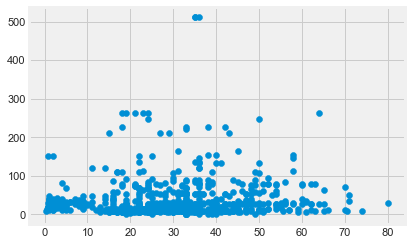

In [706]:
plt.scatter(df.Age,df.Fare)

In [707]:
km = KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [708]:
y_predicted= km.fit_predict(df[['Age','Fare']])
y_predicted

array([1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 2, 1,

In [709]:
df['cluster']=y_predicted
df.head()

,Name,Age,Fare,Initial,cluster
0,"Braund, Mr. Owen Harris",22.0,7.2500,Mr,1
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,71.2833,Mrs,0
2,"Heikkinen, Miss. Laina",26.0,7.9250,Miss,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,53.1000,Mrs,0
4,"Allen, Mr. William Henry",35.0,8.0500,Mr,1


In [710]:
%pylab inline 


Populating the interactive namespace from numpy and matplotlib


No handles with labels found to put in legend.


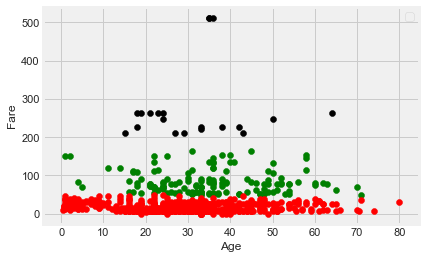

In [711]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1.Age,df1['Fare'],color = 'green')
plt.scatter(df2.Age,df2['Fare'],color = 'red')
plt.scatter(df3.Age,df3['Fare'],color = 'black')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend()

No handles with labels found to put in legend.


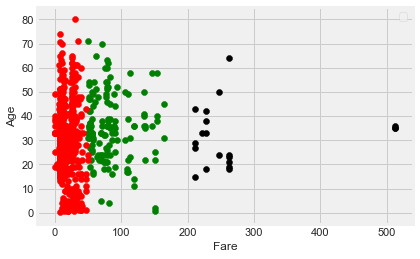

In [712]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1['Fare'],df1.Age,color = 'green')
plt.scatter(df2['Fare'],df2.Age,color = 'red')
plt.scatter(df3['Fare'],df3.Age,color = 'black')
plt.ylabel('Age')
plt.xlabel('Fare')
plt.legend()

In [453]:
df

,Name,Age,Fare,Initial,cluster
0,"Braund, Mr. Owen Harris",22.0,7.2500,Mr,2
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,71.2833,Mrs,0
2,"Heikkinen, Miss. Laina",26.0,7.9250,Miss,2
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,53.1000,Mrs,0
4,"Allen, Mr. William Henry",35.0,8.0500,Mr,2
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",27.0,13.0000,Other,2
887,"Graham, Miss. Margaret Edith",19.0,30.0000,Miss,2
888,"Johnston, Miss. Catherine Helen ""Carrie""",22.0,23.4500,Miss,2
889,"Behr, Mr. Karl Howell",26.0,30.0000,Mr,2


In [713]:
sc=MinMaxScaler()
sc.fit(df[['Age']])
df['Age']=sc.transform(df[['Age']])

In [714]:
df

,Name,Age,Fare,Initial,cluster
0,"Braund, Mr. Owen Harris",0.271174,7.2500,Mr,1
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.472229,71.2833,Mrs,0
2,"Heikkinen, Miss. Laina",0.321438,7.9250,Miss,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.434531,53.1000,Mrs,0
4,"Allen, Mr. William Henry",0.434531,8.0500,Mr,1
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",0.334004,13.0000,Other,1
887,"Graham, Miss. Margaret Edith",0.233476,30.0000,Miss,1
888,"Johnston, Miss. Catherine Helen ""Carrie""",0.271174,23.4500,Miss,1
889,"Behr, Mr. Karl Howell",0.321438,30.0000,Mr,1


In [715]:
sc=MinMaxScaler()
sc.fit(df[['Fare']])
df['Fare']=sc.transform(df[['Fare']])

In [716]:
df

,Name,Age,Fare,Initial,cluster
0,"Braund, Mr. Owen Harris",0.271174,0.014151,Mr,1
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.472229,0.139136,Mrs,0
2,"Heikkinen, Miss. Laina",0.321438,0.015469,Miss,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.434531,0.103644,Mrs,0
4,"Allen, Mr. William Henry",0.434531,0.015713,Mr,1
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",0.334004,0.025374,Other,1
887,"Graham, Miss. Margaret Edith",0.233476,0.058556,Miss,1
888,"Johnston, Miss. Catherine Helen ""Carrie""",0.271174,0.045771,Miss,1
889,"Behr, Mr. Karl Howell",0.321438,0.058556,Mr,1


In [717]:
km= KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age', 'Fare']])
y_predicted

array([2, 0, 0, 0, 0, 0, 1, 2, 0, 2, 2, 1, 2, 0, 2, 1, 2, 0, 0, 0, 0, 0,
       2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 1, 0, 1, 0, 2, 2, 2, 0, 0, 0, 2,
       2, 0, 0, 2, 0, 2, 2, 2, 1, 0, 1, 0, 2, 0, 2, 2, 2, 0, 1, 2, 0, 2,
       0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 2, 0, 2, 1, 0, 1, 0, 1, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2,
       1, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 1, 0, 2,
       1, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 1, 2, 1, 0,
       0, 1, 2, 0, 0, 2, 1, 0, 0, 2, 2, 2, 0, 1, 0, 0, 1, 2, 2, 2, 1, 2,
       2, 1, 0, 0, 2, 0, 2, 2, 2, 0, 0, 1, 0, 0, 0, 2, 2, 2, 1, 1, 0, 0,
       2, 2, 0, 0, 0, 1, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 1, 0, 0, 2, 2, 2, 2, 2, 0, 0, 1, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       0, 2, 0, 1, 0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 2, 1, 0,
       2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 2, 1, 1, 0, 2, 0, 1, 0, 2, 2, 0, 0,
       0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 1, 2,

In [718]:
df['cluster']=y_predicted
df

,Name,Age,Fare,Initial,cluster
0,"Braund, Mr. Owen Harris",0.271174,0.014151,Mr,2
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.472229,0.139136,Mrs,0
2,"Heikkinen, Miss. Laina",0.321438,0.015469,Miss,0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.434531,0.103644,Mrs,0
4,"Allen, Mr. William Henry",0.434531,0.015713,Mr,0
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",0.334004,0.025374,Other,0
887,"Graham, Miss. Margaret Edith",0.233476,0.058556,Miss,2
888,"Johnston, Miss. Catherine Helen ""Carrie""",0.271174,0.045771,Miss,2
889,"Behr, Mr. Karl Howell",0.321438,0.058556,Mr,0


In [719]:
km.cluster_centers_

array([[0.40370991, 0.04801379],
       [0.64396415, 0.11667009],
       [0.20482494, 0.05977556]])

No handles with labels found to put in legend.


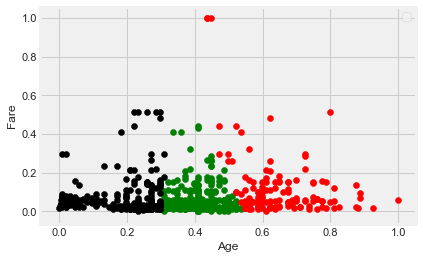

In [720]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1.Age,df1['Fare'],color = 'green')
plt.scatter(df2.Age,df2['Fare'],color = 'red')
plt.scatter(df3.Age,df3['Fare'],color = 'black')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend()

No handles with labels found to put in legend.


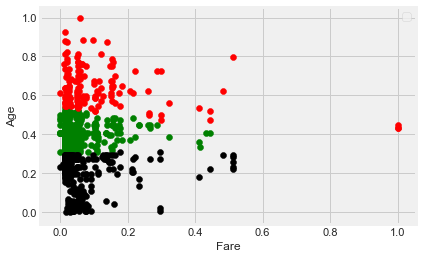

In [721]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1['Fare'],df1.Age,color = 'green')
plt.scatter(df2['Fare'],df2.Age,color = 'red')
plt.scatter(df3['Fare'],df3.Age,color = 'black')
plt.ylabel('Age')
plt.xlabel('Fare')
plt.legend()

In [722]:
k_rng=range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Fare']])
    sse.append(km.inertia_)

In [723]:
sse

[33.163249933113455,
 18.859245724888236,
 13.110890535996486,
 8.754991374324431,
 6.378184765822988,
 5.303403333391413,
 4.352438977975344,
 3.759949542306482,
 3.227046378111474]

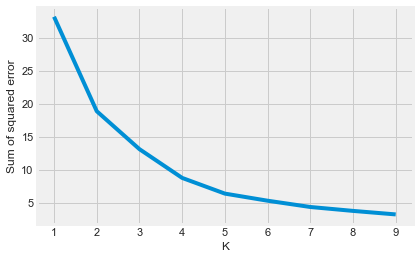

In [724]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

# Hierarchical Clustering

In [725]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

importing data:

In [726]:
df=pd.read_csv('Unsupervised.csv')

In [727]:
df

,Name,Age,Fare
0,"Braund, Mr. Owen Harris",22.0,7.2500
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,71.2833
2,"Heikkinen, Miss. Laina",26.0,7.9250
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,53.1000
4,"Allen, Mr. William Henry",35.0,8.0500
...,...,...,...
886,"Montvila, Rev. Juozas",27.0,13.0000
887,"Graham, Miss. Margaret Edith",19.0,30.0000
888,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,23.4500
889,"Behr, Mr. Karl Howell",26.0,30.0000


In [728]:
df.isnull().sum()


Name      0
Age     177
Fare      0
dtype: int64

In [729]:
df['Initial']=0
for i in df:
    df['Initial']=df.Name.str.extract('([A-Za-z]+)\.') #extracting Name initials

pd.crosstab(df.Initial,train_data.Sex).T.style.background_gradient(cmap='summer_r')


df['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess',
                               'Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss',
                                'Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

df.groupby('Initial')['Age'].mean()

df.loc[(df.Age.isnull()) & (df.Initial=='Mr'),'Age']=33
df.loc[(df.Age.isnull()) & (df.Initial=='Mrs'),'Age']=36
df.loc[(df.Age.isnull()) & (df.Initial=='Master'),'Age']=5
df.loc[(df.Age.isnull()) & (df.Initial=='Miss'),'Age']=22
df.loc[(df.Age.isnull()) & (df.Initial=='Other'),'Age']=46

In [730]:
df.Age.isnull().any()

False

In [731]:
df.head()

,Name,Age,Fare,Initial
0,"Braund, Mr. Owen Harris",22.0,7.2500,Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,71.2833,Mrs
2,"Heikkinen, Miss. Laina",26.0,7.9250,Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,53.1000,Mrs
4,"Allen, Mr. William Henry",35.0,8.0500,Mr


In [732]:
X= df.iloc[:,[1,2]].values

In [733]:
X

array([[22.    ,  7.25  ],
       [38.    , 71.2833],
       [26.    ,  7.925 ],
       ...,
       [22.    , 23.45  ],
       [26.    , 30.    ],
       [32.    ,  7.75  ]])

Using dendrogram to find the optimal number of clusters

In [734]:
import scipy.cluster.hierarchy as sch

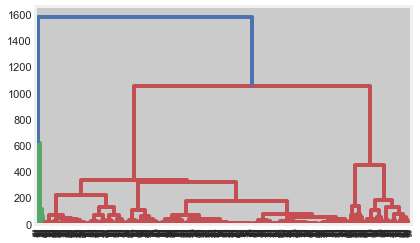

In [735]:
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

Fitting hierarchical clustering to the dataset

In [736]:
from sklearn.cluster import AgglomerativeClustering
AgglomerativeClustering()
hc=AgglomerativeClustering(affinity='euclidean', linkage='ward')
y_hc= hc.fit_predict(X)

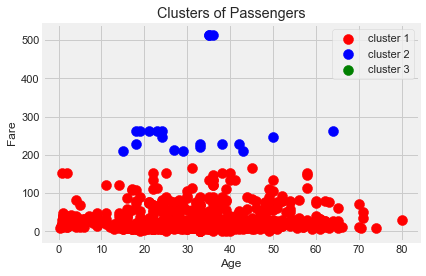

In [737]:
plt.scatter(X[y_hc==0,0], X[y_hc==0,1], s = 100, c= 'red', label='cluster 1')
plt.scatter(X[y_hc==1,0], X[y_hc==1,1], s = 100, c= 'blue', label='cluster 2')
plt.scatter(X[y_hc==2,0], X[y_hc==2,1], s = 100, c= 'green', label='cluster 3')
plt.title('Clusters of Passengers')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend()
plt.show()

<h3 align="center"> The End </h3>

In [742]:
from IPython.display import Image
Image(url="https://d13ezvd6yrslxm.cloudfront.net/wp/wp-content/images/titanic-jack-rose-door.jpg")